In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import imblearn
sns.set()


In [2]:
UCI = pd.read_csv('Data_for_UCI_named.csv')
UCI.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
UCI.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


In [4]:
UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
UCI

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [6]:
#dropping the stab column
UCI.drop(['stab'],axis=1,inplace =True)

In [7]:
y = UCI['stabf']
x = UCI.drop(['stabf'],axis=1)

In [8]:
#label encoding 
from sklearn.preprocessing import LabelEncoder 
encode = LabelEncoder()
y = encode.fit_transform(y)

In [9]:
UCI['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [11]:
x_scaled = scaler.transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state=1 ,stratify=y)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

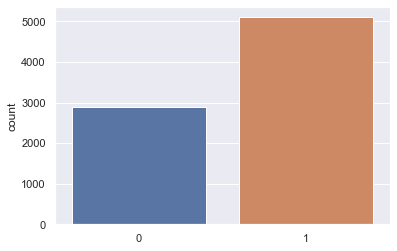

In [13]:
#visualizing the imbalanced class distributions 
sns.countplot(y_train)

In [14]:
# Using Smote to treat the imbalanced class distribution
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
x_balanced,y_balanced= smote.fit_resample(x_train,y_train)  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

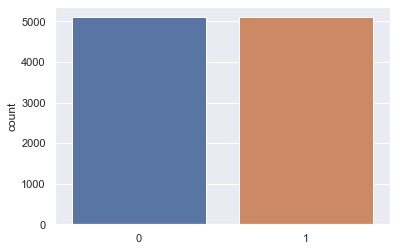

In [15]:
sns.countplot(y_balanced)

In [16]:
 Y = pd.Series(y_balanced).value_counts()
 Y


1    5104
0    5104
dtype: int64

# Model and Evaluation

In [66]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict,GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve,log_loss,confusion_matrix ,precision_score,recall_score,classification_report,accuracy_score

RandomForest Classifier


In [69]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RF = RandomForestClassifier(random_state = 1)
RF.fit(x_balanced,y_balanced)
RF_preds = RF.predict(x_test)
RF.score(x_balanced,y_balanced)

1.0

Measuring Performance Evaluation

In [72]:
#classification Report 
print(classification_report(y_test,RF_preds))

#traning 
print(f'Traning Score:',RF.score(x_balanced,y_balanced))
print(f'Test score:',RF.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(y_test,RF_preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       724
           1       0.94      0.93      0.94      1276

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Traning Score: 1.0
Test score: 0.9205
Accuracy score: 0.9205


ExtraTrees Classifier 

In [19]:
ET = ExtraTreesClassifier()
ET.fit(x_balanced,y_balanced)
ET_preds = RF.predict(x_test)

Measuring Performance Evaluation

In [73]:
print(classification_report(y_test,ET_preds))

print(f'Traning Score:',ET.score(x_balanced,y_balanced))
print(f'Testing:',ET.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(y_test,ET_preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       724
           1       0.94      0.93      0.94      1276

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Traning Score: 1.0
Testing: 0.926
Accuracy score: 0.9205


HyperParameter Tuning

In [21]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [22]:
ET.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [37]:
#parameters
Params = {'n_estimators':[100,300,500,100],
          'min_samples_split':randInt(1,10),
          'min_samples_leaf':randInt(1,10),
          'max_features':['auto','log2']}
Rc = RandomizedSearchCV(estimator = ET ,cv = 5,n_iter= 10,scoring= 'accuracy',
                        n_jobs=-1,verbose= 1,param_distributions = Params,random_state = 1)
Rc.fit(x_balanced,y_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3CA1E1460>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3B8458A00>,
                                        'n_estimators': [100, 300, 500, 100]},
                   random_state=1, scoring='accuracy', verbose=1)

In [38]:
Rc.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 500}

In [40]:
Hyper_ET = ExtraTreesClassifier(max_features = 'log2', min_samples_leaf= 2,
 min_samples_split= 8,n_estimators = 500,random_state = 1)
Hyper_ET.fit(x_balanced,y_balanced)
Hyper_ET_preds = RF.predict(x_test)

In [76]:
print(classification_report(y_test,Hyper_ET_preds))

print(f'Traning Score:',Hyper_ET.score(x_balanced,y_balanced))
print(f'Testing:',Hyper_ET.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(Hyper_ET_preds,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       724
           1       0.94      0.93      0.94      1276

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Traning Score: 1.0
Testing: 0.931
Accuracy score: 0.9205


Feature Importance

In [52]:
#Computing the feature importance of each feature
feature_importance = Hyper_ET.feature_importances_
X_train = pd.DataFrame(x_train)

In [60]:
#creating a dataframe for visualizing the feature importances 
def plot_importances(columns,importances,n=20):
    df = (pd.DataFrame({'Features':columns,
                       'Features_Importance':importances}).sort_values('Features_Importance',ascending=False)
                      .reset_index(drop=False))
    
    #Plotting the dataframe 
    fig,ax = plt.subplots(figsize =(10,8))
    ax = sns.barplot(x='Features_Importance',y='Features',data =df[:n],orient = 'h')
    plt.xlabel('Feature Importances',size=18)
    plt.ylabel('Features',size=18)
    

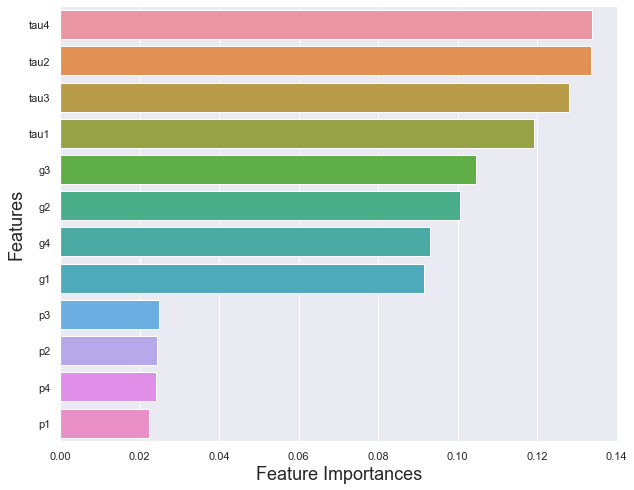

In [62]:
plot_importances(x.columns,feature_importance)

In [63]:
x.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

GradientBoosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
Gbc = GradientBoostingClassifier(random_state = 1)
Gbc.fit(x_balanced,y_balanced)
Gbc_preds = Gbc.predict(x_test)

In [79]:
print(classification_report(y_test,Gbc_preds))

print(f'Traning Score:',Gbc.score(x_balanced,y_balanced))
print(f'Testing Score:',Gbc.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(y_test,Gbc_preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       724
           1       0.95      0.92      0.94      1276

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Traning Score: 0.9493534482758621
Testing Score: 0.9195
Accuracy score: 0.9195


Lightgbm  Classifier 

In [80]:
from lightgbm import LGBMClassifier
Lgbm = LGBMClassifier(random_state = 1)
Lgbm.fit(x_balanced,y_balanced)
Lgbm_preds = Lgbm.predict(x_test)

In [81]:
print(classification_report(y_test,Lgbm_preds))

print(f'Traning Score:',Lgbm.score(x_balanced,y_balanced))
print(f'Testing Score:',Lgbm.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(y_test,Lgbm_preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       724
           1       0.96      0.95      0.96      1276

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Traning Score: 0.9958855799373041
Testing Score: 0.943
Accuracy score: 0.943


XGB Classifier

In [83]:
from xgboost import XGBClassifier 
XGB = XGBClassifier(use_label_encoder=False,random_state = 1)
XGB.fit(x_balanced,y_balanced)
XGB_preds = XGB.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[15:50:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
print(classification_report(y_test,XGB_preds))

print(f'Traning Score:',XGB.score(x_balanced,y_balanced))
print(f'Testing Score:',XGB.score(x_test,y_test))
print(f'Accuracy score:',accuracy_score(y_test,XGB_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       724
           1       0.97      0.96      0.96      1276

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Traning Score: 1.0
Testing Score: 0.9535
Accuracy score: 0.9535
